Dataset Shape: (1025, 14)
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  

Logistic Regression Accuracy: 0.7951219512195122

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.

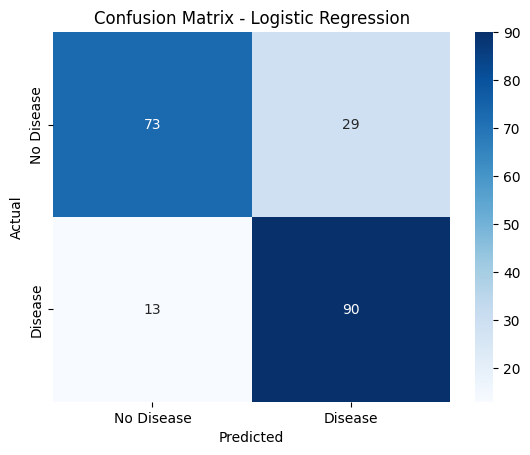


Predicted Labels on Test Data (Logistic Regression):
[1 1 0 1 0 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1
 0 1 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1
 1 1 0 1 1 1 0 0 0 0 1 0 1 0 0 1 0 0 1 1 1 1 1 0 0 0 0 0 1 1 0 1 0 1 0 1 1
 1 1 0 1 1 1 1 1 0 0 1 0 0 0 0 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1
 1 0 1 0 1 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 1 0 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 0 0]

KNN Accuracy (K=5): 0.8341463414634146

Classification Report (KNN):
              precision    recall  f1-score   support

           0       0.88      0.77      0.82       102
           1       0.80      0.89      0.84       103

    accuracy                           0.83       205
   macro avg       0.84      0.83      0.83       205
weighted avg       0.84      0.83      0.83       205

Confusion Matrix (KNN):
[[79 23]
 [11 92]]


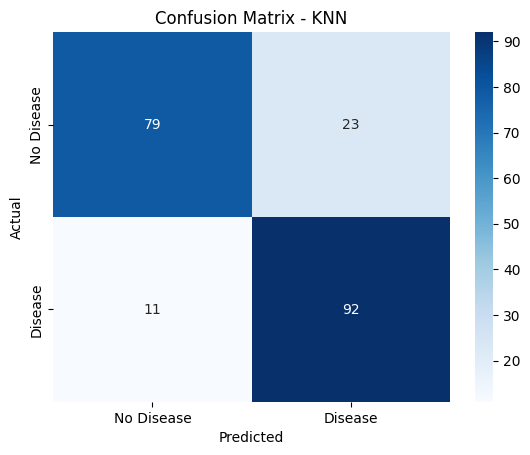


Predicted Labels on Test Data (KNN):
[1 1 0 1 0 0 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1 0 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1
 0 1 1 0 1 0 1 0 0 0 0 0 1 1 0 1 0 1 1 0 0 1 1 0 1 0 1 0 0 1 0 0 1 0 0 0 1
 1 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 1 1 1 1 0 0 0 0 1 0 1 1 0 1 0 1 0 1 1
 1 1 0 1 1 0 1 1 0 1 1 0 0 0 0 1 0 0 1 1 0 1 1 0 1 0 1 1 0 1 1 1 0 1 1 1 1
 0 0 1 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1 0 1 1 0 1 1 1 0 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 0 1]


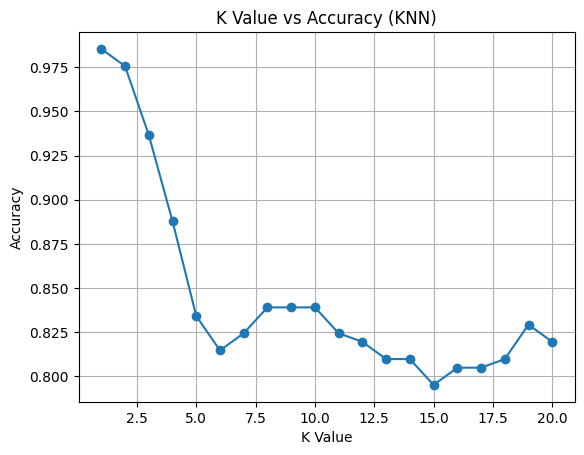


Best K value for KNN: 1 with Accuracy: 0.9854


In [ ]:
# Heart Disease Prediction using Logistic Regression and KNN

# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Step 2: Load Dataset
df = pd.read_csv('heart.csv')  
print("Dataset Shape:", df.shape)
print(df.head())

# Step 3: Data Preprocessing
X = df.drop('target', axis=1)
y = df['target']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ------------------------ Logistic Regression ------------------------
lr_model = LogisticRegression(max_iter=200)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

print("\nLogistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report (Logistic Regression):")
print(classification_report(y_test, y_pred_lr))

cm_lr = confusion_matrix(y_test, y_pred_lr)
print("Confusion Matrix (Logistic Regression):")
print(cm_lr)

sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues',
            xticklabels=["No Disease", "Disease"],
            yticklabels=["No Disease", "Disease"])
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("\nPredicted Labels on Test Data (Logistic Regression):")
print(y_pred_lr)

# ------------------------------ KNN ------------------------------
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

print("\nKNN Accuracy (K=5):", accuracy_score(y_test, y_pred_knn))
print("\nClassification Report (KNN):")
print(classification_report(y_test, y_pred_knn))

cm_knn = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix (KNN):")
print(cm_knn)

sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues',
            xticklabels=["No Disease", "Disease"],
            yticklabels=["No Disease", "Disease"])
plt.title("Confusion Matrix - KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("\nPredicted Labels on Test Data (KNN):")
print(y_pred_knn)

# ------------------------ K-value vs Accuracy (Optional) ------------------------
accuracy_scores = []
k_values = range(1, 21)
for k in k_values:
    tmp = KNeighborsClassifier(n_neighbors=k)
    tmp.fit(X_train, y_train)
    pred_k = tmp.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, pred_k))

plt.plot(k_values, accuracy_scores, marker='o')
plt.title("K Value vs Accuracy (KNN)")
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

best_k = k_values[np.argmax(accuracy_scores)]
print(f"\nBest K value for KNN: {best_k} with Accuracy: {max(accuracy_scores):.4f}")